In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df=pd.read_csv('placement.csv')

In [145]:
display(df)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [146]:
print(df.shape)
print(df.columns)

(1000, 3)
Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [148]:
df.isna().any()

cgpa                    False
placement_exam_marks    False
placed                  False
dtype: bool

No. of Placed Count: 
 0    511
1    489
Name: placed, dtype: int64


Text(0.5, 1.0, 'PLACED COUNT')

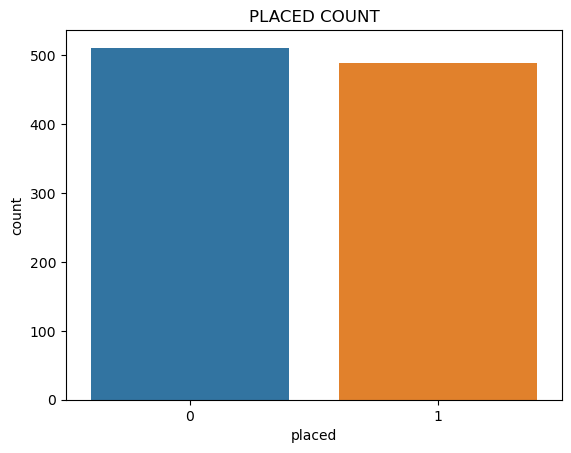

In [149]:
print("No. of Placed Count: \n",df['placed'].value_counts())
sns.countplot(x=df['placed'])
plt.title('PLACED COUNT')

Text(0.5, 1.0, 'CGPA')

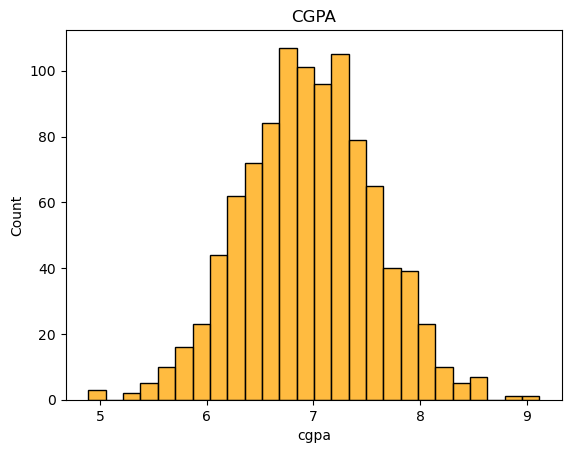

In [150]:
sns.histplot(data=df,x=df['cgpa'],color='orange')
plt.title('CGPA')

Text(0.5, 1.0, 'MARK COUNT')

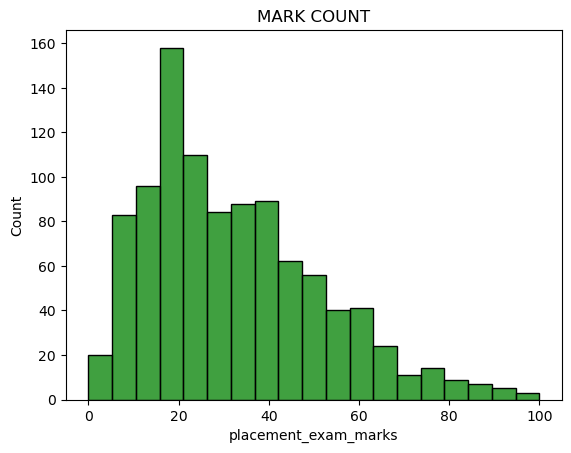

In [151]:
sns.histplot(data=df,x=df['placement_exam_marks'],color='green')
plt.title('MARK COUNT')

In [152]:
cor=df.corr()

In [153]:
cor.style.background_gradient()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x=df.iloc[:,0:2]
y=df['placed']

In [156]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
# Scaling.
from sklearn.preprocessing import StandardScaler

In [132]:
scl=StandardScaler()

In [133]:
xtr=scl.fit_transform(xtr)
xts=scl.transform(xts)

In [157]:
xtr

,cgpa,placement_exam_marks
687,6.81,23.0
500,6.07,24.0
332,7.03,39.0
979,7.00,13.0
817,7.84,26.0
...,...,...
835,6.67,65.0
192,6.67,38.0
629,8.15,11.0
559,6.61,58.0


In [158]:
ytr

687    0
500    1
332    0
979    1
817    0
      ..
835    1
192    0
629    1
559    1
684    0
Name: placed, Length: 800, dtype: int64

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
mod=LogisticRegression()

In [182]:
mod.fit(xtr,ytr)

LogisticRegression()

In [183]:
ypred=mod.predict(xts)
print(ypred)

[0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]


In [184]:
# Confusion Matrix.
from sklearn.metrics import confusion_matrix

In [185]:
c=confusion_matrix(yts,ypred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[66 38]
 [53 43]]


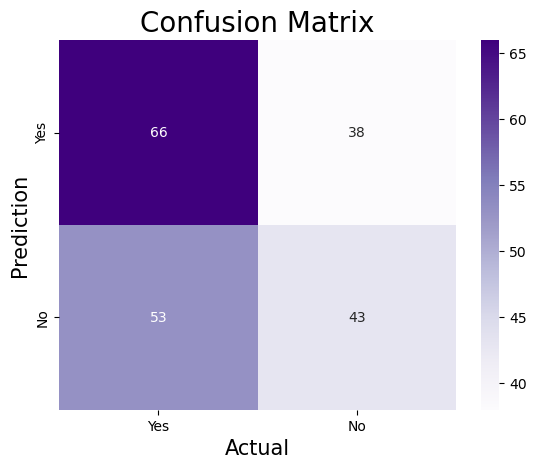

In [186]:
sns.heatmap(c,annot=True,fmt='g',cmap='Purples',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [188]:
acc=accuracy_score(yts,ypred)
print("Accuracy is:",acc*100)
pre=precision_score(yts,ypred)
print("Precision:",pre*100)
rec=recall_score(yts,ypred)
print("Recall:",rec*100)
F1=f1_score(yts,ypred)
print("F1 Score:",F1*100)

Accuracy is: 54.50000000000001
Precision: 53.086419753086425
Recall: 44.79166666666667
F1 Score: 48.58757062146893
